<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Acquisition" data-toc-modified-id="Data-Acquisition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Acquisition</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Predictions-and-Time-Series-Analysis" data-toc-modified-id="Predictions-and-Time-Series-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Predictions and Time Series Analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Establishing-the-Baseline-Model" data-toc-modified-id="Establishing-the-Baseline-Model-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Establishing the Baseline Model</a></span></li></ul></li><li><span><a href="#Now-it-is-stationary" data-toc-modified-id="Now-it-is-stationary-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Now it is stationary</a></span></li></ul></li><li><span><a href="#Parameter-Selection-for-the-Seasonal-ARIMA-Time-Series-Model" data-toc-modified-id="Parameter-Selection-for-the-Seasonal-ARIMA-Time-Series-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Parameter Selection for the Seasonal ARIMA Time Series Model</a></span></li><li><span><a href="#Simple-Linear-Regression" data-toc-modified-id="Simple-Linear-Regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Simple Linear Regression</a></span></li><li><span><a href="#Classification" data-toc-modified-id="Classification-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Observations:" data-toc-modified-id="Observations:-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Observations:</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
os.listdir()

['.DS_Store',
 'code_snippets',
 'Untitled.ipynb',
 'Weather DS project.ipynb',
 'DataScience_final_project_weather.pdf',
 'Weather_data',
 'Time Series Project.ipynb',
 '.ipynb_checkpoints']

In [3]:
os.chdir('Weather_data')

In [4]:
os.listdir()

['weather_data_train.csv',
 't_mu_time_df.csv',
 'weather_data_train_labels.csv',
 'weather_data_test_labels.csv',
 'weather_data_test.csv']

# Data Acquisition

In [5]:
# Import the training and testing data
X_train = pd.read_csv('weather_data_train.csv',parse_dates=['datetime'], sep=';', decimal=','
                     , infer_datetime_format=True)
X_test = pd.read_csv('weather_data_test.csv',parse_dates=['datetime'], sep=';', decimal=',',
                    infer_datetime_format=True)
Y_train = pd.read_csv('weather_data_train_labels.csv',parse_dates=['datetime'], sep=';', decimal=',',
                    infer_datetime_format=True)
Y_test = pd.read_csv('weather_data_test_labels.csv',parse_dates=['datetime'], sep=';', decimal=',',
                    infer_datetime_format=True)

# Check the shape of the dataset
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3140, 17)
(1346, 17)
(3140, 3)
(1346, 3)


# Data Exploration

In [6]:
tn_mu = np.array(X_train.iloc[:,4])
tx_mu = np.array(X_train.iloc[:,5])

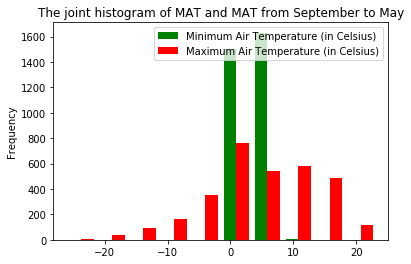

In [7]:
legend = ['Minimum Air Temperature (in Celsius)', 'Maximum Air Temperature (in Celsius)']
plt.hist([tn_mu,tx_mu], color=['green','red'])
plt.ylabel("Frequency")
plt.legend(legend)
plt.title('The joint histogram of MAT and MAT from September to May')
plt.show()

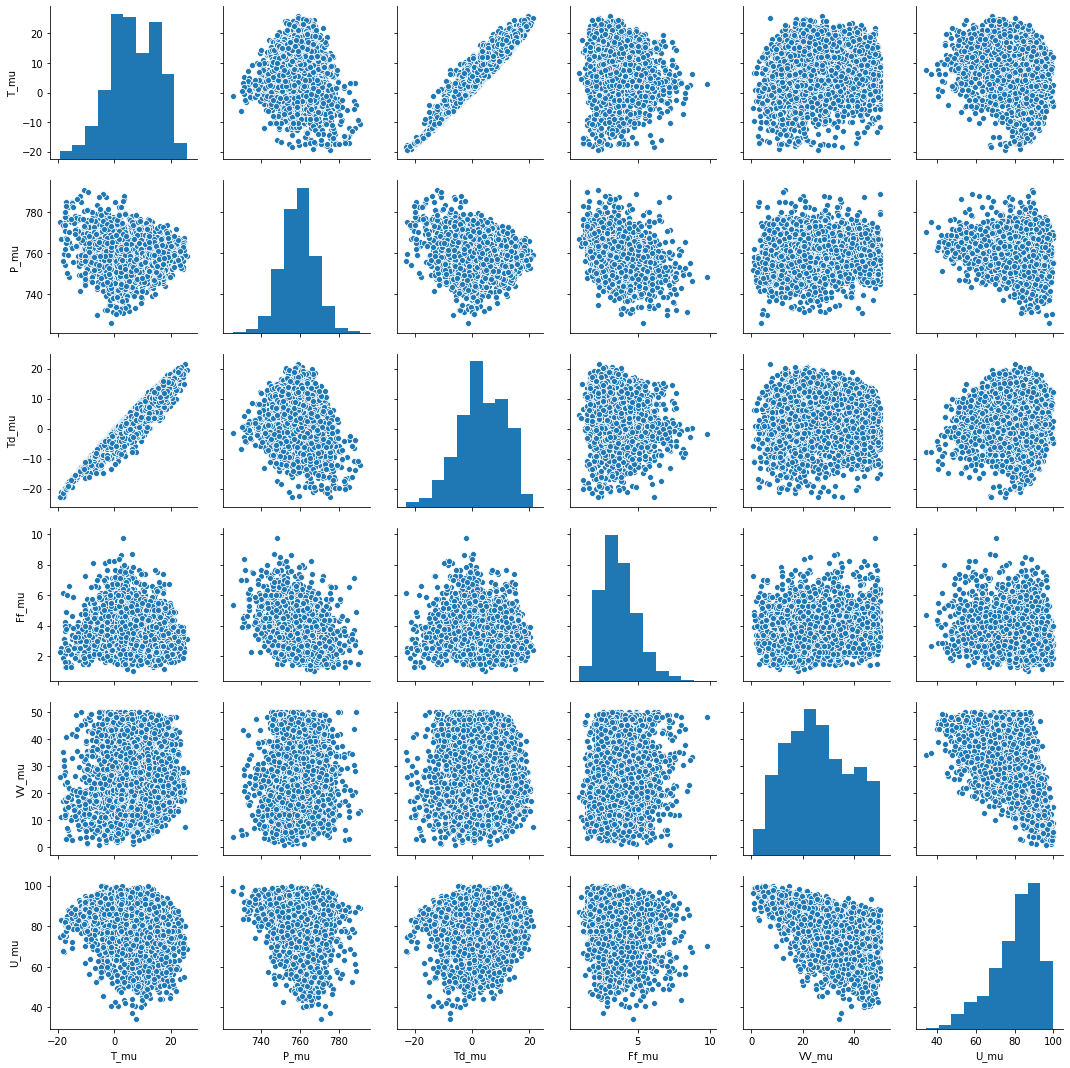

In [8]:
import seaborn as sns

U_mu = Y_train['U_mu']
#print(type(U_mu))
U_mu.to_frame(name='U_mu')

df = pd.concat([X_train,U_mu],axis=1)
df
#df = X_train.join(U_mu)
df_features = df[['T_mu','P_mu','Td_mu','Ff_mu','VV_mu','U_mu']]
sns.pairplot(df_features)
#features

In [9]:
def corr_matrix(df_features):
    # Compute the correlation matrix
    corr = df_features.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    return sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

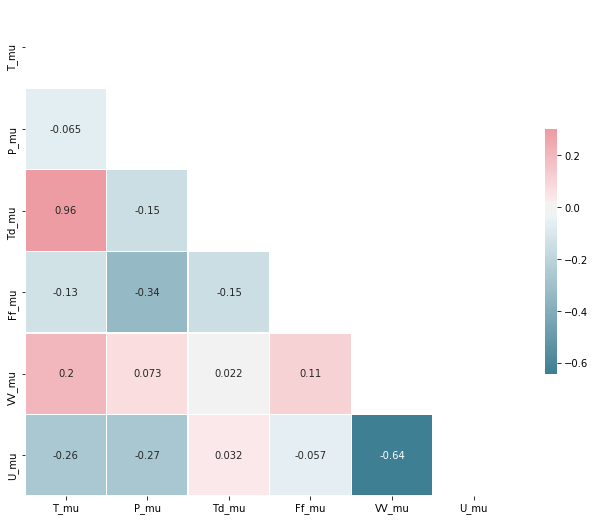

In [10]:
corr_matrix(df_features)

In [11]:
from sklearn.preprocessing import StandardScaler
import numpy
features = ['T_mu','Po_mu','P_mu','Ff_mu','Tn_mu','Tx_mu','VV_mu'
            ,'Td_mu','T_var','Po_var','P_var','Ff_var','Tn_var','Tx_var',
            'VV_var','Td_var']
# Separating out the features
x = X_train.loc[:, features].values
#x = x[~numpy.isnan(x)]
#x = x.reshape(-1,1)
# Separating out the target
y = Y_train.loc[:,['OBSERVED']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

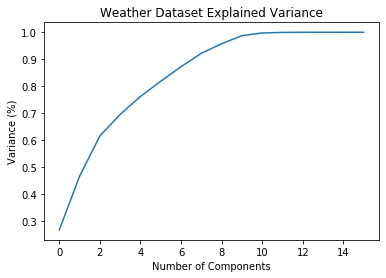

In [12]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Weather Dataset Explained Variance')
plt.show()

# Predictions and Time Series Analysis

In [13]:
temp_df = X_train[["datetime","T_mu"]]
temp_df.describe()

,T_mu
count,3140.000000
mean,6.780096
std,8.595021
min,-19.312500
25%,0.987500
50%,6.537500
75%,13.953125
max,25.787500


In [14]:
mask = (temp_df['datetime'] >= '2011-01-01') & (temp_df['datetime'] <= '2015-09-02')

In [15]:
temp_df = temp_df.loc[mask]

# Reset the index 
temp_df.set_index("datetime", inplace=True)

In [16]:
temp_df.to_csv('t_mu_time_df.csv', index=True, header=True)

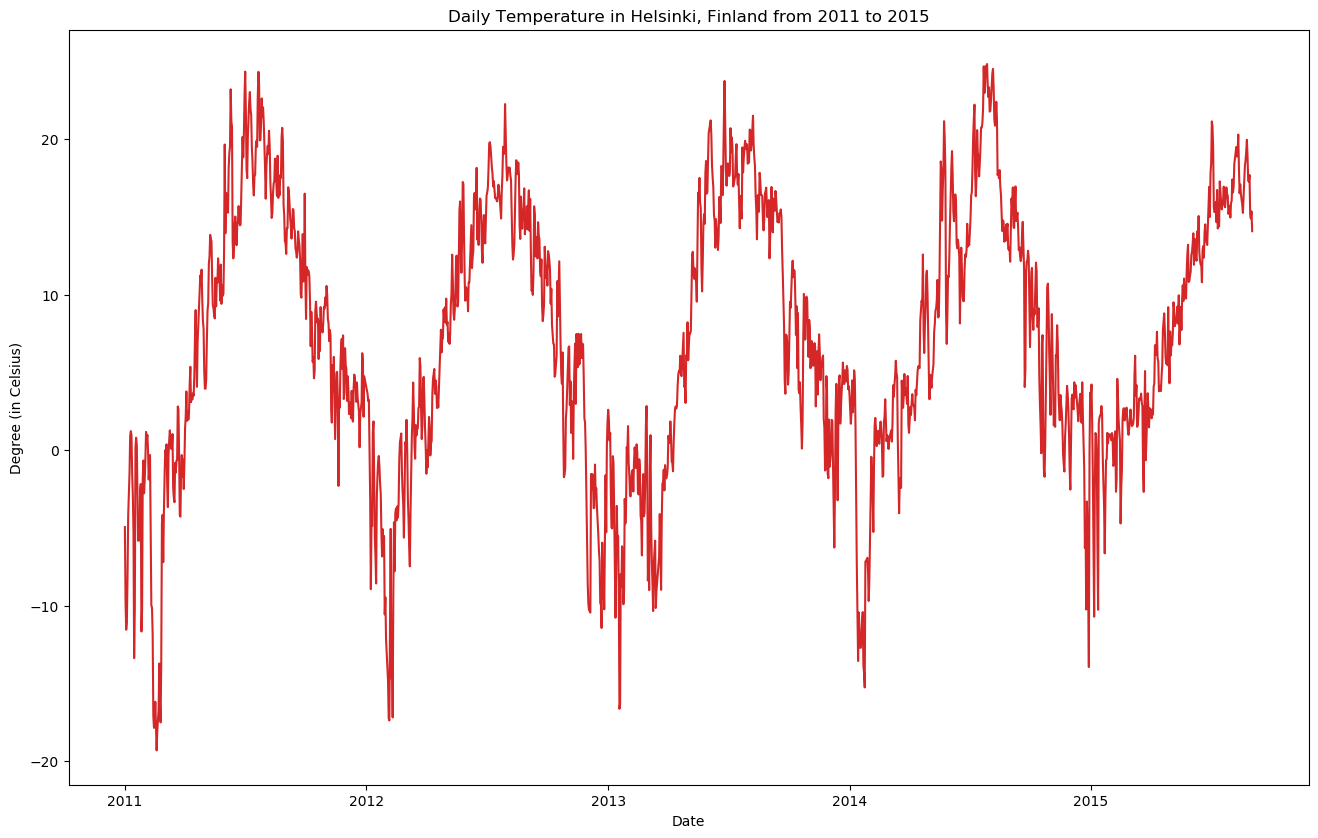

In [17]:
# Plot the daily temperature change 
plt.figure(figsize=(16,10), dpi=100)
plt.plot(temp_df.index, temp_df.T_mu, color='tab:red')
plt.gca().set(title="Daily Temperature in Helsinki, Finland from 2011 to 2015", xlabel='Date', ylabel="Degree (in Celsius)")
plt.show()

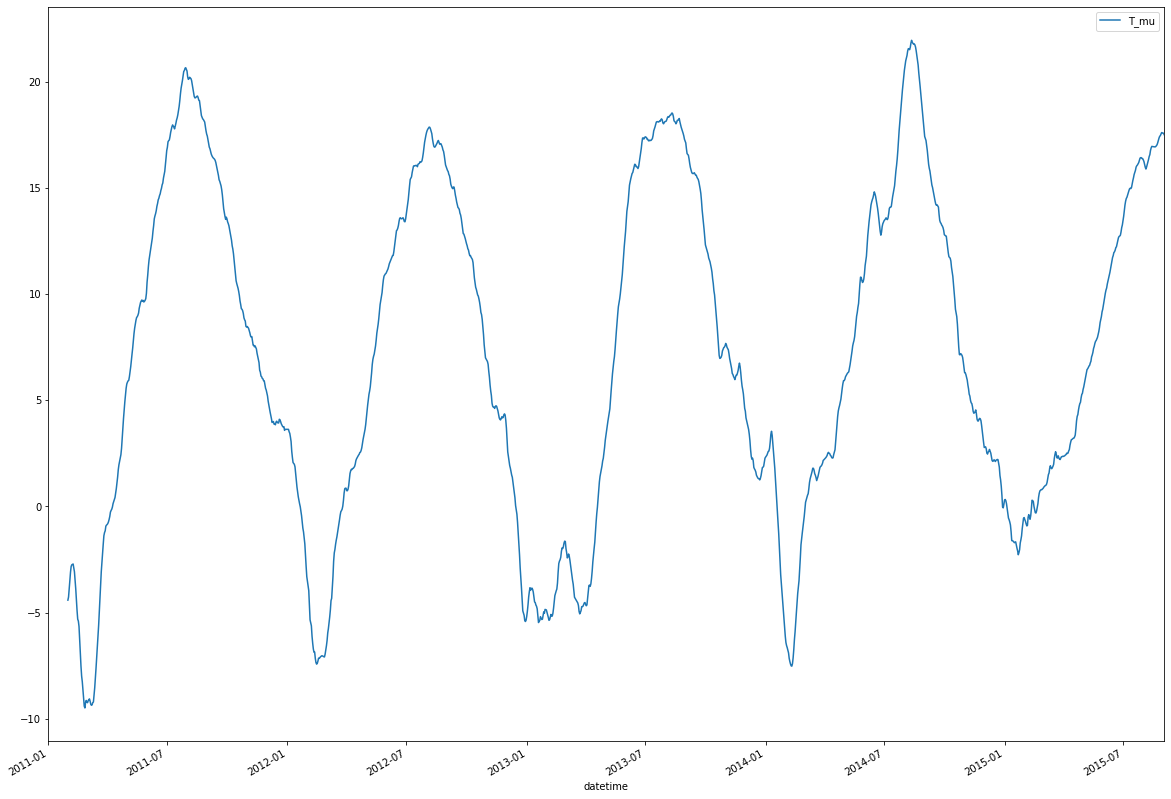

In [18]:
temp_df_mean = temp_df.rolling(window=30).mean()
temp_df_mean.plot(figsize=(20,15))

The graph suggested the time series has seasonality and thus not stationary. Look at the decomposition of the time series into its components

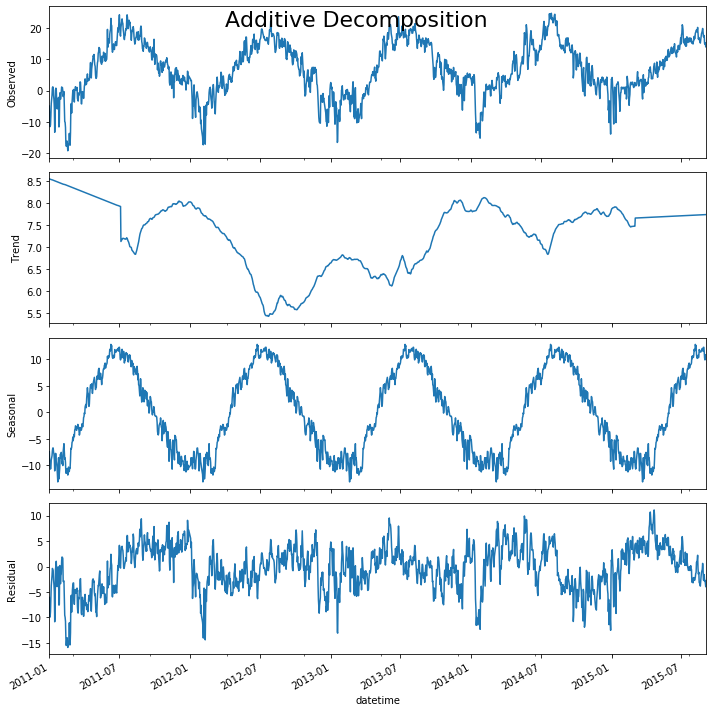

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(temp_df['T_mu'], model='additive', extrapolate_trend='freq', freq=365)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decomposition', fontsize=22)
plt.show()

### Establishing the Baseline Model

Assumption: The air temperature today depends on the air temperature yesterday, the air temperature yesterday depends on the day before yesterday, and so on. 

In [20]:
temp_df

,T_mu
datetime,
2011-01-01,-4.942857
2011-01-02,-9.800000
2011-01-03,-11.550000
2011-01-04,-11.025000
2011-01-05,-8.125000
2011-01-06,-4.187500
2011-01-08,-1.475000
2011-01-09,0.937500
2011-01-10,1.225000


In [21]:
predicted_df = temp_df["T_mu"].to_frame().shift(1).rename(columns = {"T_mu": "T_mu_pred" })
actual_df = temp_df["T_mu"].to_frame().rename(columns = {"T_mu": "T_mu_actual" })
one_step_df = pd.concat([actual_df,predicted_df],axis=1)

In [22]:
temp_train = one_step_df[1:]

In [23]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

temp_pred_err = sqrt(MSE(temp_train.T_mu_actual, temp_train.T_mu_pred))

In [24]:
temp_train.to_csv("t_mu_time_df.csv", index=True, header=True)

In [25]:
temp_train_df = pd.read_csv('t_mu_time_df.csv').set_index("datetime")
temp_train_df

,T_mu_actual,T_mu_pred
datetime,,
2011-01-02,-9.8000,-4.942857
2011-01-03,-11.5500,-9.800000
2011-01-04,-11.0250,-11.550000
2011-01-05,-8.1250,-11.025000
2011-01-06,-4.1875,-8.125000
2011-01-08,-1.4750,-4.187500
2011-01-09,0.9375,-1.475000
2011-01-10,1.2250,0.937500
2011-01-11,0.9625,1.225000


In [26]:
temp_train_df

,T_mu_actual,T_mu_pred
datetime,,
2011-01-02,-9.8000,-4.942857
2011-01-03,-11.5500,-9.800000
2011-01-04,-11.0250,-11.550000
2011-01-05,-8.1250,-11.025000
2011-01-06,-4.1875,-8.125000
2011-01-08,-1.4750,-4.187500
2011-01-09,0.9375,-1.475000
2011-01-10,1.2250,0.937500
2011-01-11,0.9625,1.225000


In [27]:
temp_pred_err

2.200079781275245

In [28]:
# An auxiliary function for differencing the seasonality components
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

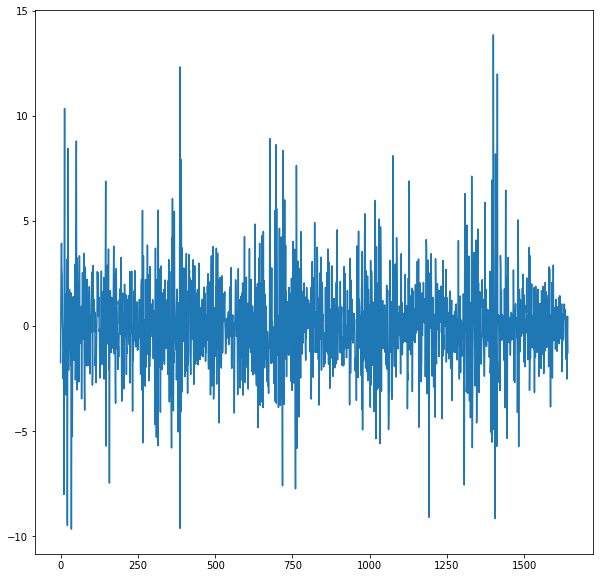

In [29]:
# difference the dataset
diff = difference(temp_train.T_mu_actual)
plt.plot(diff)
plt.show()

In [30]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(diff)
print("The p-value of the Dickey-Fuller test is ",pvalue)

The p-value of the Dickey-Fuller test is  0.0


## Now it is stationary

# Parameter Selection for the Seasonal ARIMA Time Series Model

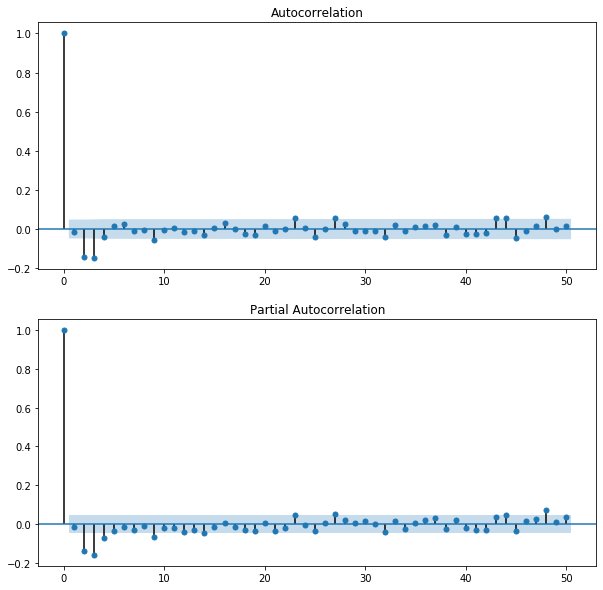

In [31]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(diff, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(diff, lags=50, ax=ax[1])
plt.show()

In [32]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [33]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(temp_train.T_mu_actual,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:12584.997551192475
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:11379.866682046304
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:9972.693549700847
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:9741.711154979808
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:9902.935782998851
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:9787.50921784661
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:9734.879675937016
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:9730.590990701556
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:10741.00061748875
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:9818.55398548386
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:8878.347587040738
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:8563.612404690215
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:8776.141575972517
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8601.954451935548
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:8583.614617141378
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8558.556098191752
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:7243.281892620848
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:7177.90734

In [34]:
mod = sm.tsa.statespace.SARIMAX(temp_train.T_mu_actual,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7591      0.033     23.024      0.000       0.694       0.824
ma.L1         -0.8903      0.024    -36.972      0.000      -0.937      -0.843
ma.S.L12      -0.9830      0.010    -98.151      0.000      -1.003      -0.963
sigma2         4.5895      0.114     40.112      0.000       4.365       4.814


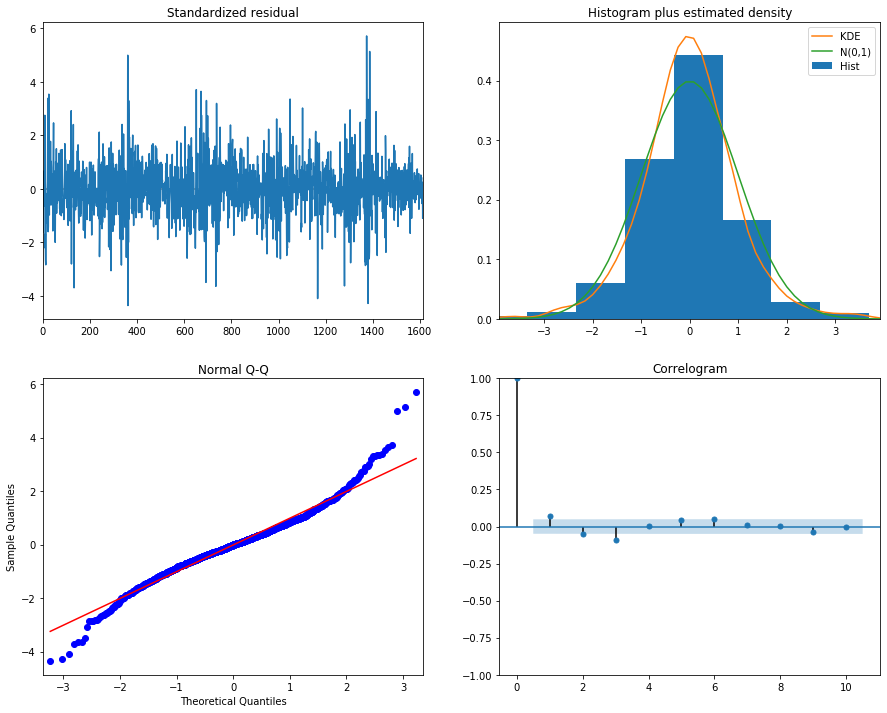

In [35]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [47]:
temp_train

,T_mu_actual,T_mu_pred
datetime,,
2011-01-02,-9.8000,-4.942857
2011-01-03,-11.5500,-9.800000
2011-01-04,-11.0250,-11.550000
2011-01-05,-8.1250,-11.025000
2011-01-06,-4.1875,-8.125000
2011-01-08,-1.4750,-4.187500
2011-01-09,0.9375,-1.475000
2011-01-10,1.2250,0.937500
2011-01-11,0.9625,1.225000


In [37]:
pred = results.get_prediction(
    start=pd.to_datetime('2013-09-03'), dynamic=False)

In [38]:
pred_ci = pred.conf_int()

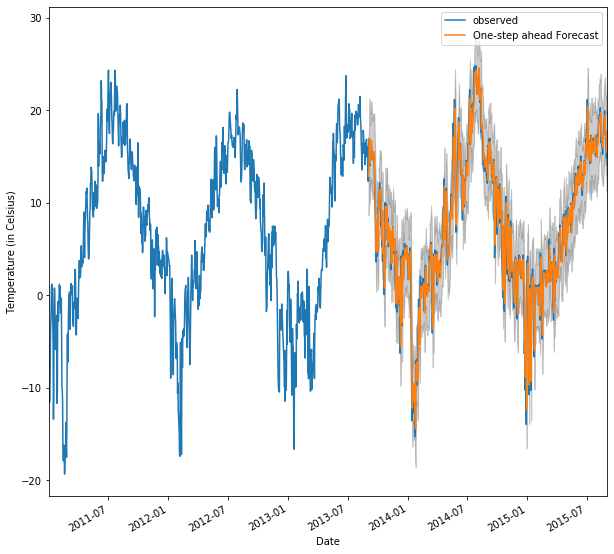

In [39]:
ax = temp_train.T_mu_actual['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Temperature (in Celsius)')
plt.legend()

plt.show()

In [40]:
y_forecasted = pred.predicted_mean
y_truth = temp_train.T_mu_actual['2013-09-03':]

# Compute the mean square error
mse = sqrt(MSE(y_truth, y_forecasted).mean())
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2.11


AlIn this case, we only use information from the time series up to a certain point, and after that, forecasts are generated using values from previous forecasted time points.

In the code chunk below, we specify to start computing the dynamic forecasts and confidence intervals from January 1998 onwards.

In [41]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-09-03'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

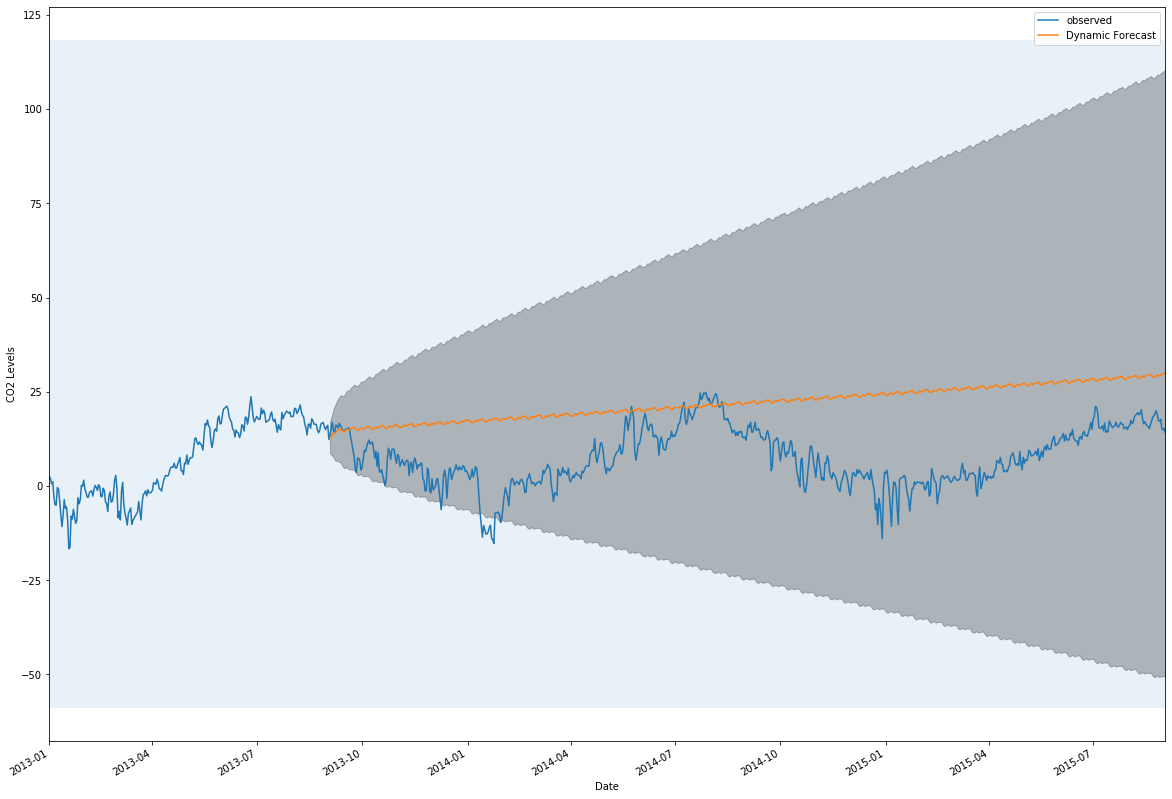

In [42]:
ax = temp_train.T_mu_actual['2013':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), temp_train.T_mu_actual.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [43]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = temp_train.T_mu_actual['2013-09-03':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 275.13


# Simple Linear Regression 

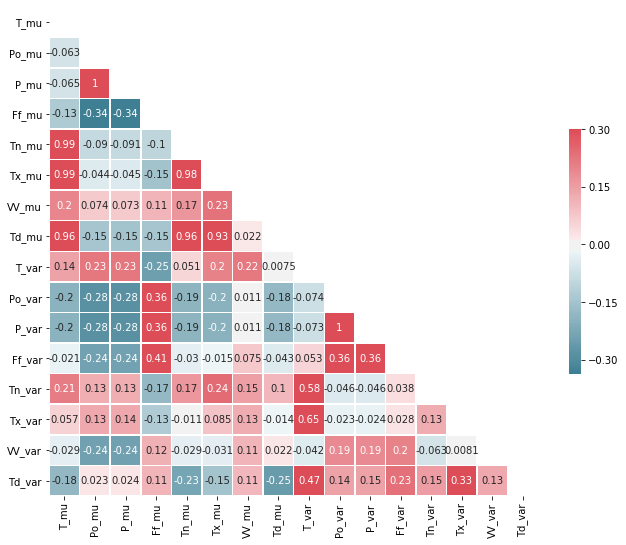

In [44]:
features = []
for i in X_train.columns:
    features.append(i)

# Compute the correlation matrix
corr = X_train[features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train,Y_train["U_mu"])
Y_pred = linear_regressor.predict(X_test)  # make predictions

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
comparison = Y_test[["U_mu"]]
comparison["Predicted"] = Y_pred
comparison.head(25).plot.line()

In [ ]:
for i in X_train.columns:
    train_features = X_train.drop(columns=[i])
    linear_regressor = LinearRegression()
    linear_regressor.fit(train_features,Y_train["U_mu"])
    test_features = X_test.drop(columns=[i])
    predictions = linear_regressor.predict(test_features)
    MSE = (mean_squared_error(Y_test["U_mu"], predictions))
    print("The MSE if feature", i, "is dropped is", round(MSE,3))

In [ ]:
from sklearn import metrics

sig_features = ["T_mu","Td_mu"]
train_features = X_train[sig_features]
#train_features
linear_regressor.fit(train_features, Y_train["U_mu"])
test_features = X_test[sig_features]
#test_features
predictions = linear_regressor.predict(test_features)
MSE = metrics.mean_squared_error(Y_test["U_mu"],predictions)
print("The MSE when using only 2 features T_mu and Td_mu: ", round(MSE,3))

In [ ]:
vals_cmp = Y_test[["U_mu"]]
vals_cmp["Predicted"] = predictions
vals_cmp

In [ ]:
lines = vals_cmp.head(25).plot.line()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy

features = ['T_mu','Po_mu','P_mu','Ff_mu','Tn_mu','Tx_mu','VV_mu'
            ,'Td_mu','T_var','Po_var','P_var','Ff_var','Tn_var','Tx_var',
            'VV_var','Td_var']

def PCA(x_train,y_train,features,target,components=int()):
    # Separating out the features
    x = x_train.loc[:, features].values

    # Separating out the target
    y = y_train.loc[:,[target]].values

    # Standardizing the testing and training data
    train_data = StandardScaler().fit_transform(x)
    test_data = StandardScaler().fit_transform(y)
    
    # Fit PCA onto the training set
    pca = PCA(2).fit(x)
    return pca

def plot_cumulative_variance(pca, title):
    #Plotting the Cumulative Summation of the Explained Variance
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Variance (%)') #for each component
    plt.title(title)
    plt.show()

In [ ]:
#pca = PCA(X_train,Y_train,features,"U_mu")    

In [ ]:
from sklearn.decomposition import PCA

# Separating the training features
x_train = X_train.loc[:, features].values

# Separating the training target
y_train = Y_train.loc[:,["U_mu"]].values

# Separating the test features
x_test = X_test.loc[:, features].values

scaler = StandardScaler()

# Fit on training set only
scaler.fit(x_train)

# Apply the mapping (transform) to both the training set and the test set
x_train_data = pca.transform(x_train)
y_train_data = pca.transform(y_train)
x_test_data = pca.transform(x_test)

In [ ]:
# Make an instance of the Model
pca = PCA(n_components=8)

# Fit PCA onto the training set
pca.fit(x_train_data)



In [ ]:
# Import the model
from sklearn.linear_model import LinearRegression

# Make an instance of the model 
linear_regressor = LinearRegression()
linear_regressor.fit(x_train_data, y_train_data)


In [ ]:
pca.fit(x_test_data)

In [ ]:
Y_pred = linear_regressor.predict(x_test_data)

In [ ]:
Y_pred.shape

In [ ]:
Y_pred

In [ ]:
Y_test["U_mu"]

In [ ]:
MSE = metrics.mean_squared_error(Y_test["U_mu"], Y_pred)
print("The MSE when using only 8 components: ", round(MSE,3))

# Classification

## Data Exploration

In [ ]:
Y_test["OBSERVED"].value_counts()

In [ ]:
sns.countplot(x="OBSERVED", data = Y_test, palette="Set2")
plt.show()

In [ ]:
count_not_dry = len(Y_test[Y_test["OBSERVED"]==0])
count_dry = len(Y_test[Y_test["OBSERVED"]==1])
pct_of_not_dry = count_not_dry/(count_not_dry+count_dry)
print("The percentage of not-dry days is",round(pct_of_not_dry*100,3))
pct_of_dry = count_dry/(count_not_dry+count_dry)
print("The percentage of dry days is",round((pct_of_dry*100),3))

In [ ]:
X_train_with_target = X_train
X_train_with_target["OBSERVED"] = Y_train["OBSERVED"]

X_train_with_target.groupby("OBSERVED").mean()

### Observations:
*    The average air temperature for the dry day is higher than that of the not-dry day. That is, the higher the temperature the day is, the more likely the day is dry.
*    The average atmospheric pressure is higher in the dried day than in the not-dry day. 
*    Interestingly, on average, the wind speed is inversely proportional to the dryness of the day. The lower the wind speed is, the more likely the day is dry.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
x_train_wth_obs = X_train
x_train_wth_obs["OBSERVED"] = Y_train["OBSERVED"]

In [ ]:
def corr_matrix(X_train):
    features = []
    for i in X_train.columns:
        features.append(i)

    # Compute the correlation matrix
    corr = X_train[features].corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    return (corr, sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}))

In [ ]:
(corr_matrix, heatmap) = corr_matrix(x_train_wth_obs)

In [ ]:
correlated_features = set()
correlation_matrix = x_train_wth_obs.drop('OBSERVED', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
correlated_features

In [ ]:
uncorr_x_train = x_train_wth_obs.drop(correlated_features, axis=1).drop(columns = "OBSERVED")
uncorr_x_train

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(rfc, step=1,cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(uncorr_x_train, Y_train["OBSERVED"])

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
rfecv.estimator_.feature_importances_

In [ ]:
dset = pd.DataFrame()
dset['attr'] = uncorr_x_train.columns
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#008080')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
# Train the model 
rfc.fit(uncorr_x_train,Y_train["OBSERVED"])

# Make predictions
y_pred = rfc.predict(X_test.drop(correlated_features, axis=1))

In [ ]:
print("Accuracy: ", metrics.accuracy_score(Y_test["OBSERVED"], y_pred))

In [ ]:
features = ["Po_mu","P_mu","VV_mu","T_var","VV_var"]

In [ ]:
import math

# A function for making classification using K-NN algorithm
def knn_classification(k_neighbors,X_train,Y_train,X_test,Y_test, features,target):
    # Make an instance of the model
    knn = KNeighborsClassifier(n_neighbors=k_neighbors,metric='euclidean', algorithm='auto')
    knn.fit(X_train[features], Y_train[target])
    y_pred = knn.predict(X_test[features])
    # Calculate the confusion matrix
    confu_matrix = confusion_matrix(Y_test[target], y_pred)
    return (knn,confu_matrix)
    
# An auxiliary function for making the graphical confusion matrix
def plot_confusion_matrix(confusion_matrix, title):
    plt.clf()
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]))
    plt.show()
    
def score_true_vals(confusion_matrix, k_neighbors):
    total = confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[1][0] + confusion_matrix[1][1]
    right_vals = str(confusion_matrix[0][0] + confusion_matrix[1][1]) + "/" + str(total)
    percent_right = (confusion_matrix[0][0] + confusion_matrix[1][1]) / total
    print("The accuracy of the model using k = " + str(k_neighbors) + " is" , right_vals + " = " + str(round(percent_right,3)*100) + "%")
    return percent_right

In [ ]:
# Temporary holder variables
tmp = 3
tmp_acc = 0
percent_right = 0
for i in range(10):
    (model, confu_matrix) = knn_classification(tmp,X_train,Y_train,X_test,Y_test,features,"OBSERVED")
    tmp_acc = score_true_vals(confu_matrix, k_neighbors=tmp)
    if tmp_acc > percent_right:
        tmp = tmp + 2
        percent_right = tmp_acc
    else:
        break

In [ ]:
from sklearn.linear_model import LogisticRegression